In [1]:
library(h2o)
h2o.init()
data<-h2o.uploadFile("../data/german_credit.csv")


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:stats’:

    cor, sd, var

The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/RtmppCUDha/h2o_micio1970_started_from_r.out
    /tmp/RtmppCUDha/h2o_micio1970_started_from_r.err


Starting H2O JVM and connecting: .. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 526 milliseconds 
    H2O cluster version:        3.10.2.2 
    H2O cluster version age:    3 months and 5 days  
    H2O cluster name:           H2O_started_from_R_micio1970_hdk093 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.71 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    R Version:                  R version 3.3.2 (2016-10-31) 

Note:  As started, H2O is limited to the CRAN default of 2 CPUs.
       Shut down and restart H2O as sh

In [2]:
h2o.head(data)

Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,⋯,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
1,1,18,4,2,1049,1,2,4,2,⋯,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,⋯,2,1,36,3,1,2,3,2,1,1
1,2,12,2,9,841,2,4,2,2,⋯,4,1,23,3,1,1,2,1,1,1
1,1,12,4,0,2122,1,3,3,3,⋯,2,1,39,3,1,2,2,2,1,2
1,1,12,4,0,2171,1,3,4,3,⋯,4,2,38,1,2,2,2,1,1,2
1,1,10,4,0,2241,1,2,1,3,⋯,3,1,48,3,1,2,2,2,1,2


In [3]:
h2o.describe(data)

Label,Type,Missing,Zeros,PosInf,NegInf,Min,Max,Mean,Sigma,Cardinality
Creditability,int,0,300,0,0,0,1,0.7,0.458486870270251,NA
Account Balance,int,0,0,0,0,1,4,2.577,1.25763772711089,NA
Duration of Credit (month),int,0,0,0,0,4,72,20.903,12.0588144527564,NA
Payment Status of Previous Credit,int,0,40,0,0,0,4,2.545,1.08311963704299,NA
Purpose,int,0,234,0,0,0,10,2.828,2.74443945969809,NA
Credit Amount,int,0,0,0,0,250,18424,3271.248,2822.75175989565,NA
Value Savings/Stocks,int,0,0,0,0,1,5,2.105,1.58002261739238,NA
Length of current employment,int,0,0,0,0,1,5,3.384,1.20830625422697,NA
Instalment per cent,int,0,0,0,0,1,4,2.973,1.11871467431268,NA
Sex & Marital Status,int,0,0,0,0,1,4,2.682,0.708080064242298,NA


In [4]:
### Convert Numeric to Categorical ###
to_factors <- c(1,2,4,5,7,8,9,10,11,12,13,15,16,17,18,19,20)
for(i in to_factors) data[,i] <- h2o.asfactor(data[,i])

In [5]:
h2o.describe(data)

Label,Type,Missing,Zeros,PosInf,NegInf,Min,Max,Mean,Sigma,Cardinality
Creditability,enum,0,300,0,0,0,1,0.7,0.458486870270251,2
Account Balance,enum,0,274,0,0,0,3,NA,NA,4
Duration of Credit (month),int,0,0,0,0,4,72,20.903,12.0588144527564,NA
Payment Status of Previous Credit,enum,0,40,0,0,0,4,NA,NA,5
Purpose,enum,0,234,0,0,0,9,NA,NA,10
Credit Amount,int,0,0,0,0,250,18424,3271.248,2822.75175989565,NA
Value Savings/Stocks,enum,0,603,0,0,0,4,NA,NA,5
Length of current employment,enum,0,62,0,0,0,4,NA,NA,5
Instalment per cent,enum,0,136,0,0,0,3,NA,NA,4
Sex & Marital Status,enum,0,50,0,0,0,3,NA,NA,4


In [6]:
h2o.summary(data)

Warning message in h2o.summary(data):
“Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter.”

 Creditability Account Balance Duration of Credit (month)
 1:700         4:394           Min.   : 4.0              
 0:300         1:274           1st Qu.:12.0              
               2:269           Median :18.0              
               3: 63           Mean   :20.9              
                               3rd Qu.:24.0              
                               Max.   :72.0              
 Payment Status of Previous Credit Purpose Credit Amount   Value Savings/Stocks
 2:530                             3:280   Min.   :  250   1:603               
 4:293                             0:234   1st Qu.: 1359   5:183               
 3: 88                             2:181   Median : 2304   2:103               
 1: 49                             1:103   Mean   : 3271   3: 63               
 0: 40                             9: 97   3rd Qu.: 3958   4: 48               
                                   6: 50   Max.   :18424                       
 Length of current employment Inst

In [7]:
h2o.str(data)

Class 'H2OFrame' <environment: 0x314cbf0> 
 - attr(*, "op")= chr ":="
 - attr(*, "eval")= logi TRUE
 - attr(*, "id")= chr "RTMP_sid_9e76_19"
 - attr(*, "nrow")= int 1000
 - attr(*, "ncol")= int 21
 - attr(*, "types")=List of 21
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "int"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "int"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "int"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "int"
 - attr(*, "data")='data.frame':	10 obs. of  21 variables:
  ..$ Creditability                    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2
  ..$ Account Balance                  : Factor w/ 4 levels "1","2","3","4": 1 1 2 1 1 1 1 1 4 2
  ..$ Duration of Credit (month)       : num  18 9 12 12 12 10 8 6 18 24
  ..$ Payment Status of Previous Credit: Factor w/ 5 levels

In [8]:
h2o.group_by(data, by="Creditability",nrow("Creditability"))

  Creditability nrow_Creditability
1             0                300
2             1                700

[2 rows x 2 columns] 

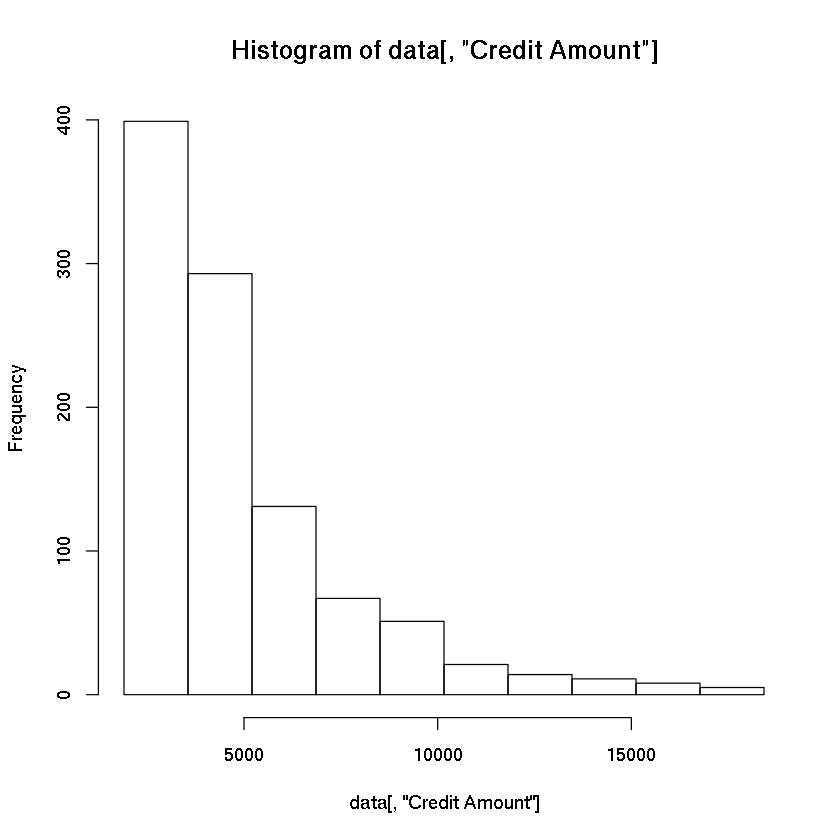

In [9]:
h2o.hist(data[,"Credit Amount"])
#h2o.hist(data[,14])

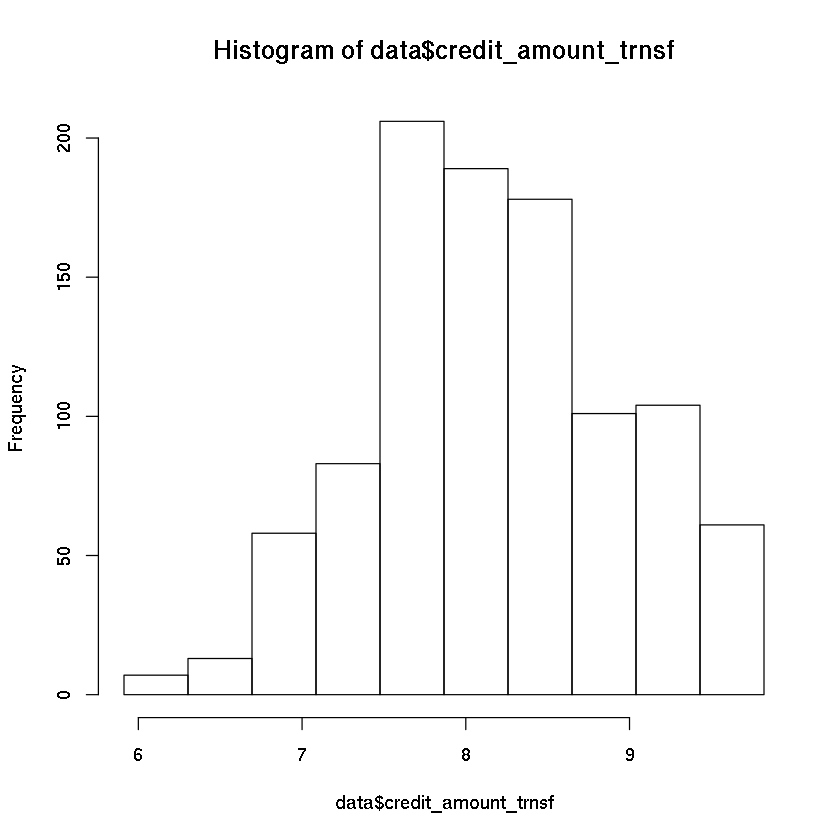

In [10]:
data$credit_amount_trnsf <- h2o.log(data[,"Credit Amount"])
h2o.hist(data$credit_amount_trnsf)

In [11]:
target <- "Creditability"

In [12]:
print(target)

[1] "Creditability"


In [13]:
a<-colnames(data)
features <- a[2:22]
print(features)

 [1] "Account Balance"                   "Duration of Credit (month)"       
 [3] "Payment Status of Previous Credit" "Purpose"                          
 [5] "Credit Amount"                     "Value Savings/Stocks"             
 [7] "Length of current employment"      "Instalment per cent"              
 [9] "Sex & Marital Status"              "Guarantors"                       
[11] "Duration in Current address"       "Most valuable available asset"    
[13] "Age (years)"                       "Concurrent Credits"               
[15] "Type of apartment"                 "No of Credits at this Bank"       
[17] "Occupation"                        "No of dependents"                 
[19] "Telephone"                         "Foreign Worker"                   
[21] "credit_amount_trnsf"              


In [14]:
set.seed(102) # Set Seed so that same sample can be reproduced in future also
# Now Selecting 75% of data as sample from total 'n' rows of the data  

# Split dataset giving the training dataset 75% of the data
data.split <- h2o.splitFrame(data=data, ratios=0.75)

# Create a training set from the 1st dataset in the split
data.train <- data.split[[1]]

# Create a testing set from the 2nd dataset in the split
data.test <- data.split[[2]]


In [15]:
nrow(data.train)

[1] 767

In [16]:
glm_model1 <- h2o.glm(x = features, 
                      y = target, 
                      training_frame = data.train,
                      model_id = "glm_model1",
                      family = "binomial")

  |======================================================================| 100%


In [17]:
print(summary(glm_model1))

Model Details:

H2OBinomialModel: glm
Model Key:  glm_model1 
GLM Model: summary
    family  link                               regularization
1 binomial logit Elastic Net (alpha = 0.5, lambda = 0.02283 )
  number_of_predictors_total number_of_active_predictors number_of_iterations
1                         71                          18                    5
    training_frame
1 RTMP_sid_9e76_24

H2OBinomialMetrics: glm
** Reported on training data. **

MSE:  0.1621729
RMSE:  0.402707
LogLoss:  0.4934618
Mean Per-Class Error:  0.3228609
AUC:  0.8069031
Gini:  0.6138062
R^2:  0.233218
Null Deviance:  941.9281
Residual Deviance:  756.9705
AIC:  794.9705

Confusion Matrix for F1-optimal threshold:
         0   1    Error      Rate
0      100 133 0.570815  =133/233
1       40 494 0.074906   =40/534
Totals 140 627 0.225554  =173/767

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold    value idx
1                       max f1  0.528189 

In [18]:
perf_obj <- h2o.performance(glm_model1, newdata = data.test)

In [19]:
print(perf_obj)

H2OBinomialMetrics: glm

MSE:  0.1831267
RMSE:  0.4279331
LogLoss:  0.5429005
Mean Per-Class Error:  0.46426
AUC:  0.7169574
Gini:  0.4339148
R^2:  0.1061169
Null Deviance:  279.8683
Residual Deviance:  252.9917
AIC:  290.9917

Confusion Matrix for F1-optimal threshold:
       0   1    Error     Rate
0      6  61 0.910448   =61/67
1      3 163 0.018072   =3/166
Totals 9 224 0.274678  =64/233

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold    value idx
1                       max f1  0.360782 0.835897 223
2                       max f2  0.211924 0.925307 232
3                 max f0point5  0.702929 0.810398 121
4                 max accuracy  0.472808 0.725322 203
5                max precision  0.939168 1.000000   0
6                   max recall  0.211924 1.000000 232
7              max specificity  0.939168 1.000000   0
8             max absolute_mcc  0.702929 0.362274 121
9   max min_per_class_accuracy  0.668232 0.668675 132


In [23]:
h2o.accuracy(perf_obj,0.939168338305063)

[[1]]
[1] 0.2918455

In [21]:
pred_creditability <- h2o.predict(glm_model1,data.test)
pred_creditability

  |======================================================================| 100%


  predict        p0        p1
1       1 0.2970714 0.7029286
2       0 0.5300577 0.4699423
3       1 0.2398353 0.7601647
4       1 0.3139088 0.6860912
5       0 0.4860326 0.5139674
6       1 0.1663972 0.8336028

[233 rows x 3 columns] 